In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire

In [4]:
def generate_logistic(N, mu):
    transients = 500
    x = np.zeros((N+transients, 1))
    x[0] = [np.random.uniform(low=0, high=0.5)]
    for i in range(1, N+transients):
        x[i] = mu * x[i-1] * (1-x[i-1])
    return x[transients:]

def bifurcation_diagram(generator_func, control_param_min, control_param_max, control_param_step, N, **kwargs):
    control_param_values = np.arange(control_param_min, control_param_max, control_param_step)
    control_params = []
    x_values = []

    for control_param in control_param_values:
        x = generator_func(N, control_param, **kwargs)
        control_params.append(np.full(x.shape, control_param).squeeze())
        x_values.append(x.squeeze())

    return np.concatenate(control_params), np.concatenate(x_values)


In [3]:
def compute_lyapunov(fn, x0, params, n_transients=500, n_iter=1000):
    x = x0
    for _ in range(n_transients):
        x = fn(x, *params)
    
    lyap_sum = 0
    for _ in range(n_iter):
        eps = 1e-8
        df = (fn(x+eps, *params) - fn(x-eps, *params)) / (2*eps)

        lyap_sum += np.log(np.abs(df))

        x = fn(x, *params)
    return lyap_sum/n_iter


In [25]:
def compute_lyapunov_2d(fn, x0, params, n_transients=500, n_iter=2000):
    dim = 2
    x = x0.copy()
    J = np.empty((dim, dim)) # construct jacobian matrix
    Q = np.eye(dim)

    for _ in range(n_transients):
        x = fn(x, *params)

    lyap_sum = np.zeros(dim)
    for _ in range(n_iter):
        J = approx_jacobian(x, fn, params)
        Q, R = np.linalg.qr(np.dot(J, Q))
        lyap_sum += np.log(np.abs(np.diag(R)))
        x = fn(x, *params)
    return lyap_sum/n_iter
def approx_jacobian(x, fn, params, eps=1e-8):
    dim = len(x)
    J = np.empty((dim, dim)) 
    fx = fn(x, *params)
    for i in range(dim):
        x_eps = x.copy()
        x_eps[i] += eps
        J[:, i] = (fn(x_eps, *params) - fx) / eps
    return J

In [44]:
control_params_log, x_values_log = bifurcation_diagram(generate_logistic, 2.5, 4.0, 0.0001, 400)


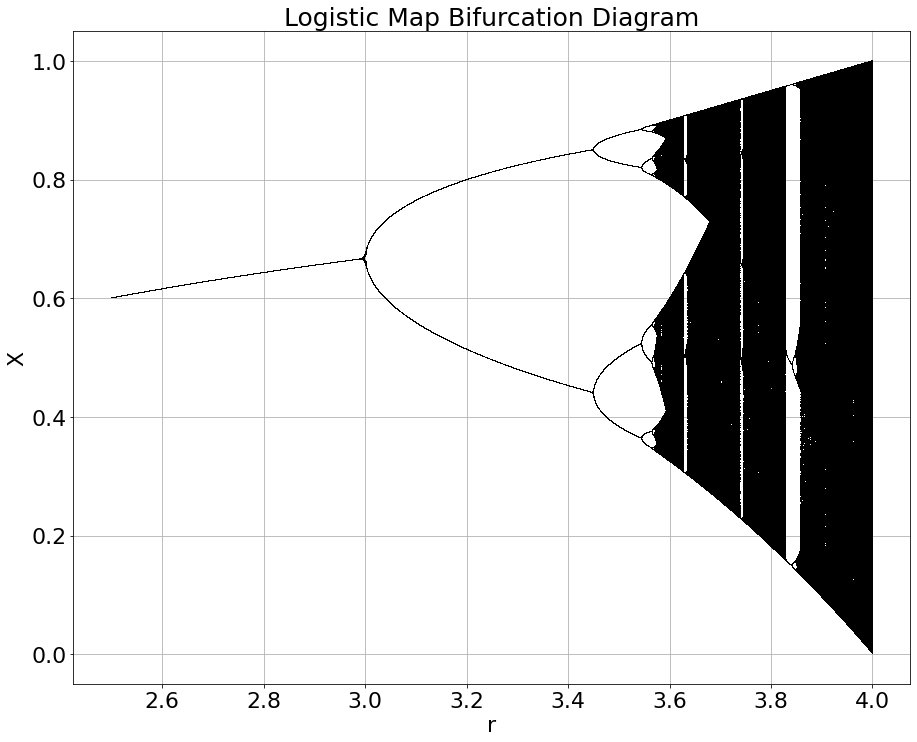

In [46]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_log, x_values_log, ',k', alpha=1)
plt.grid()
plt.xlabel('r', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Logistic Map Bifurcation Diagram', fontsize=25)
plt.savefig('logistic_bifurcation.png', dpi=400, transparent=True)
plt.show()

In [99]:
control_params_log, x_values_log = bifurcation_diagram(generate_logistic, 3.8, 4, 0.0001, 400)

In [37]:
def logistic_map(x, mu):
    return mu * x * (1-x)

In [38]:
N = 10000
x0 = 0.1
lyaps = list()
mus = np.linspace(2.5, 4, 1000)
for mu in mus:
    lyaps.append(compute_lyapunov(logistic_map, x0, [mu], n_iter=N))

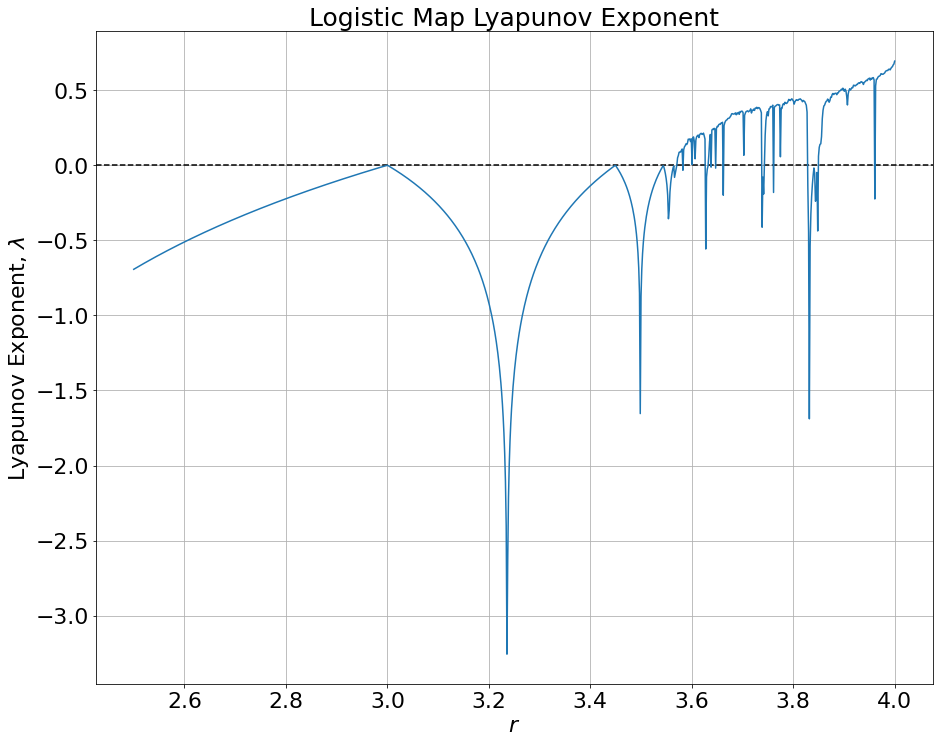

In [39]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.axhline(0, color='k', linestyle='--')
plt.plot(mus, lyaps)
plt.xlabel('$r$', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Logistic Map Lyapunov Exponent', fontsize=25)
plt.ylabel('Lyapunov Exponent, $\lambda$', fontsize=22)
plt.savefig('logistic_lyapunov.png', transparent=True, dpi=400)

Text(0.5, 1.0, 'Logistic Map Bifurcation Diagram')

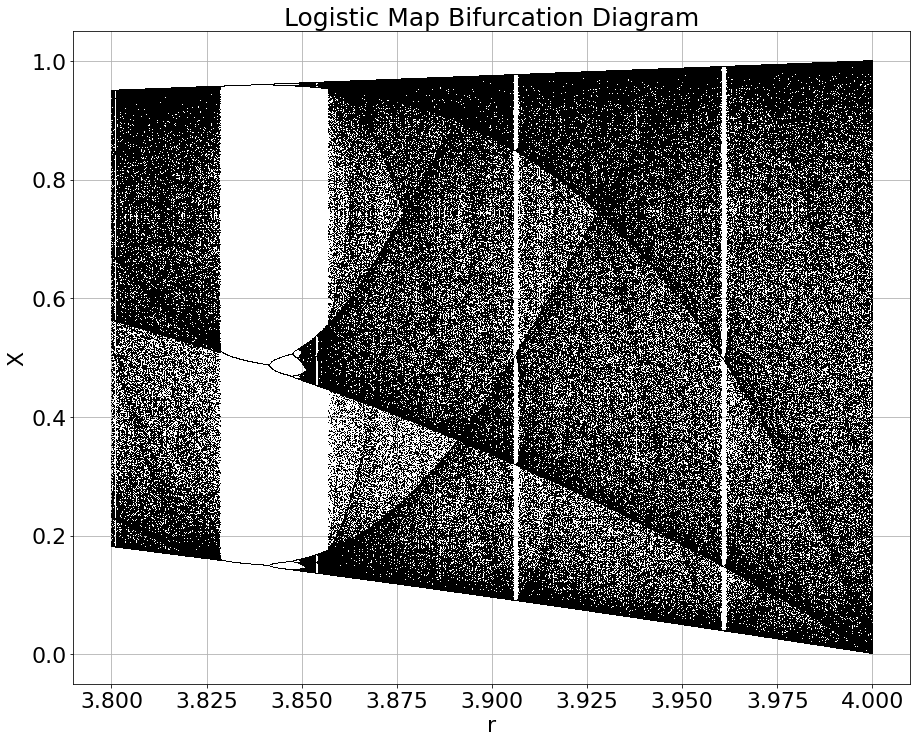

In [100]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_log, x_values_log, ',k', alpha=1)
plt.grid()
plt.xlabel('r', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Logistic Map Bifurcation Diagram', fontsize=25)

In [41]:
def generate_henon(N, mu):
    transients = 100
    b = 0.3
    x = np.zeros((N + transients, 2))
    x[0] = [np.random.uniform(low=0.001, high=0.01), np.random.uniform(low=0.001, high=0.01)]
    for i in range(1, N+transients):
        x[i, 0] = 1 - mu * x[i-1, 0]**2 + x[i-1, 1]
        x[i, 1] = b * x[i-1, 0] 

    return x[transients:, 0]

In [42]:
control_params_henon, x_values_henon = bifurcation_diagram(generate_henon, 0.1, 1.4, 0.0001, 500)

Text(0.5, 1.0, '$H\\acute{e}non$ Map Bifurcation Diagram')

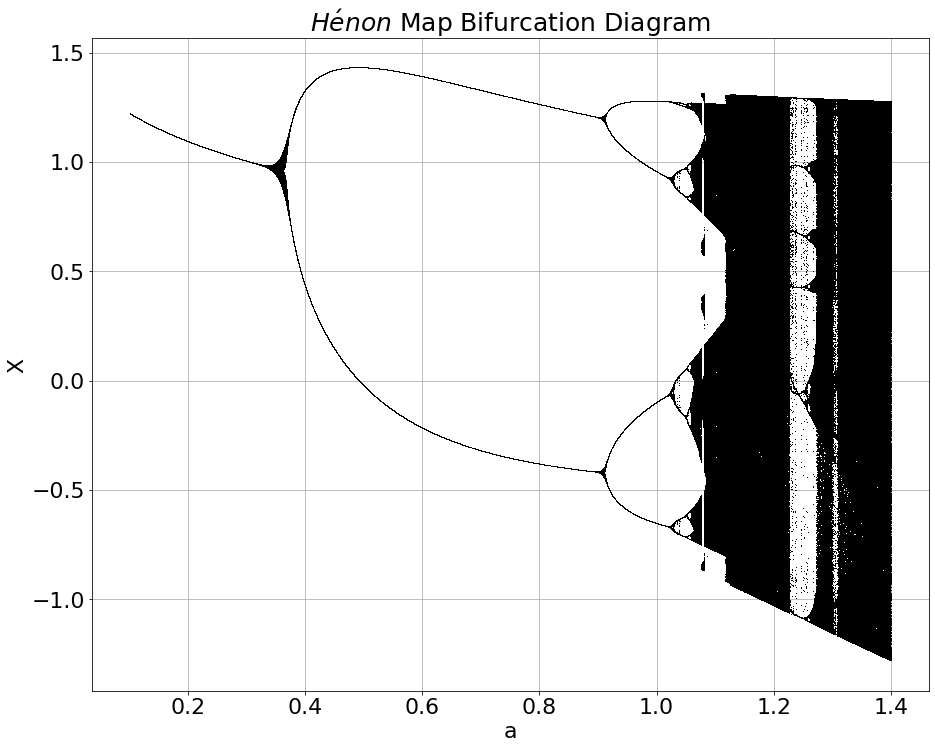

In [43]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_henon, x_values_henon, ',k', alpha=1)
plt.grid()
plt.xlabel('a', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title(r'$H\acute{e}non$ Map Bifurcation Diagram', fontsize=25)
#plt.savefig('henon_bifurcation.png', dpi=400, transparent=True)
#plt.show()

In [61]:
control_params_henon2, x_values_henon2 = bifurcation_diagram(generate_henon, 1.2,1.3, 0.0001, 500)

Text(0.5, 1.0, '$H\\acute{e}non$ Map Bifurcation Diagram')

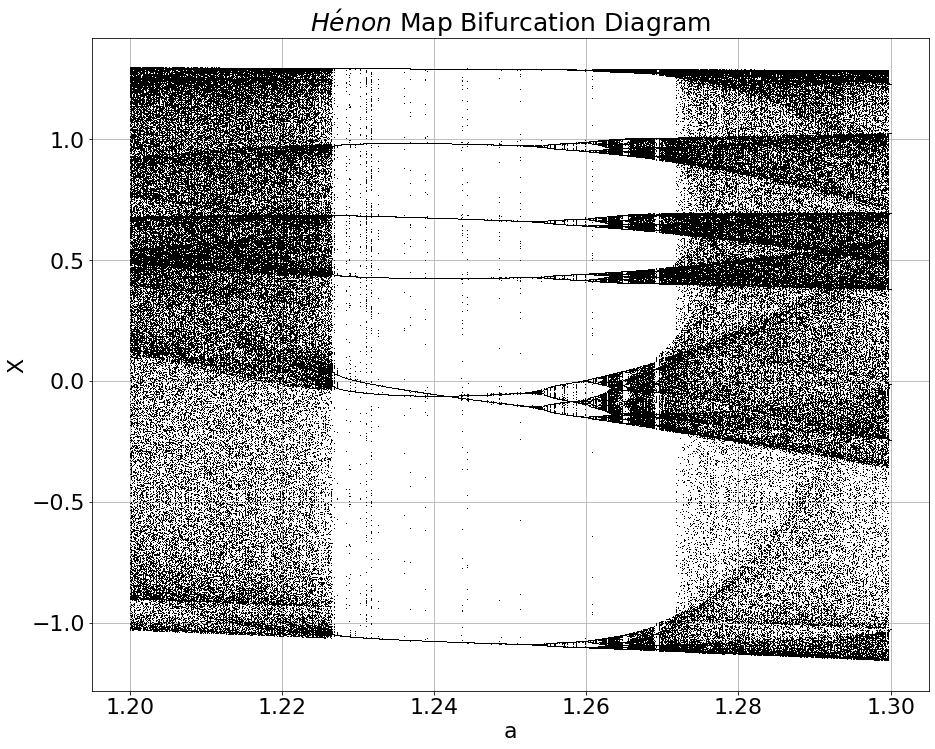

In [62]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_henon2, x_values_henon2, ',k', alpha=1)
plt.grid()
plt.xlabel('a', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title(r'$H\acute{e}non$ Map Bifurcation Diagram', fontsize=25)

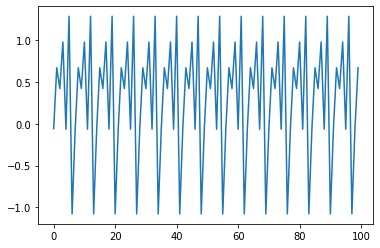

In [64]:
plt.plot(generate_henon(10000, 1.24)[:100])

In [7]:
def henon_map2(state, mu, b=0.3):
    x, y = state
    return np.array([1 - mu * x**2 + y, b * x])


In [16]:
compute_lyapunov_2d(henon_map2, [0.1, 0], [1.4])

array([ 0.42530208, -1.62927488])

In [31]:
N = 5000
x0 = [0.1, 0.1]
lyaps = list()
mus = np.linspace(0.1, 1.4, 1000)
for mu in mus:
    lyaps.append(compute_lyapunov_2d(henon_map2, x0, [mu], n_iter=N))

 Take largest Lyapunov exponent

In [32]:
LLE = np.max(lyaps, axis=1)

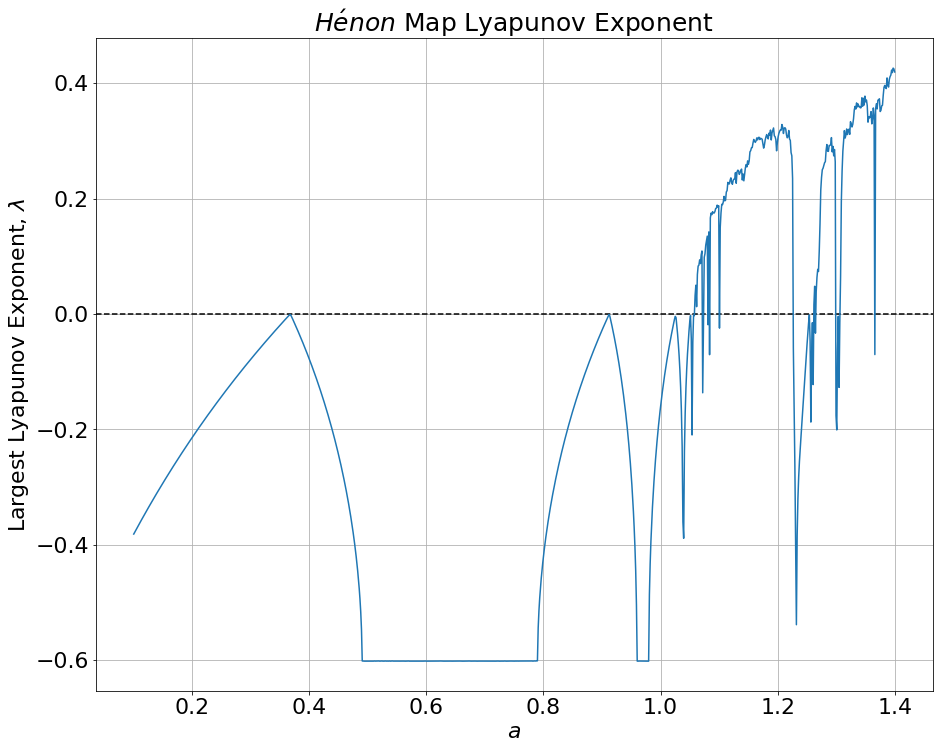

In [36]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.axhline(0, color='k', linestyle='--')
plt.plot(mus, LLE)
plt.xlabel('$a$', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title(r'$H\acute{e}non$ Map Lyapunov Exponent', fontsize=25)
plt.ylabel('Largest Lyapunov Exponent, $\lambda$', fontsize=22)
plt.savefig('henon_lyapunov.png', transparent=True, dpi=400)

In [5]:
def generate_burgers(N, mu):
    transients = 500
    a = 0.75
    x = np.zeros((N + transients, 2))
    x[0] = [np.random.uniform(low=0.001, high=0.01), np.random.uniform(low=0.001, high=0.01)]
    for i in range(1, N+transients):
        x[i, 0] = a * x[i-1, 0] - x[i-1,1]**2 
        x[i, 1] = mu * x[i-1, 1] + x[i-1, 0] * x[i-1, 1]
    return x[transients:, 0]

In [32]:
control_params_burgers, x_values_burgers = bifurcation_diagram(generate_burgers, 0.9, 1.8, 0.00005, 500)

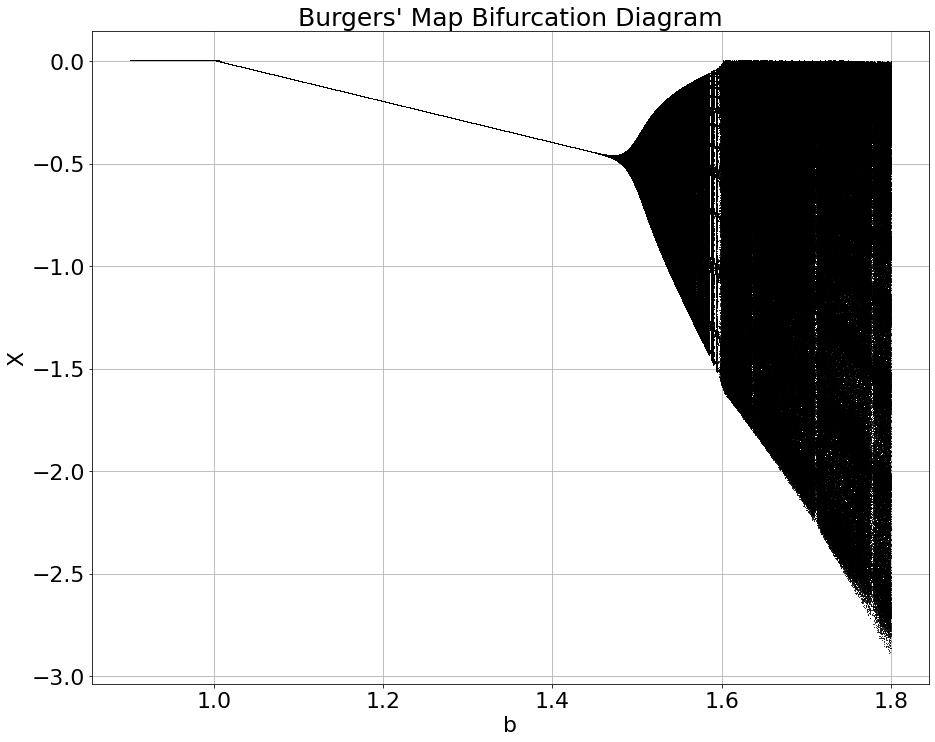

In [58]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.plot(control_params_burgers, x_values_burgers, ',k', alpha=0.8)
plt.xlabel('b', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Burgers' Map Bifurcation Diagram", fontsize=25)
plt.savefig('burgers_bifurcation.png', transparent=True, dpi=400)
#plt.show()

In [14]:
control_params_burgers2, x_values_burgers2 = bifurcation_diagram(generate_burgers, 1.45, 1.7, 0.00002, 500)


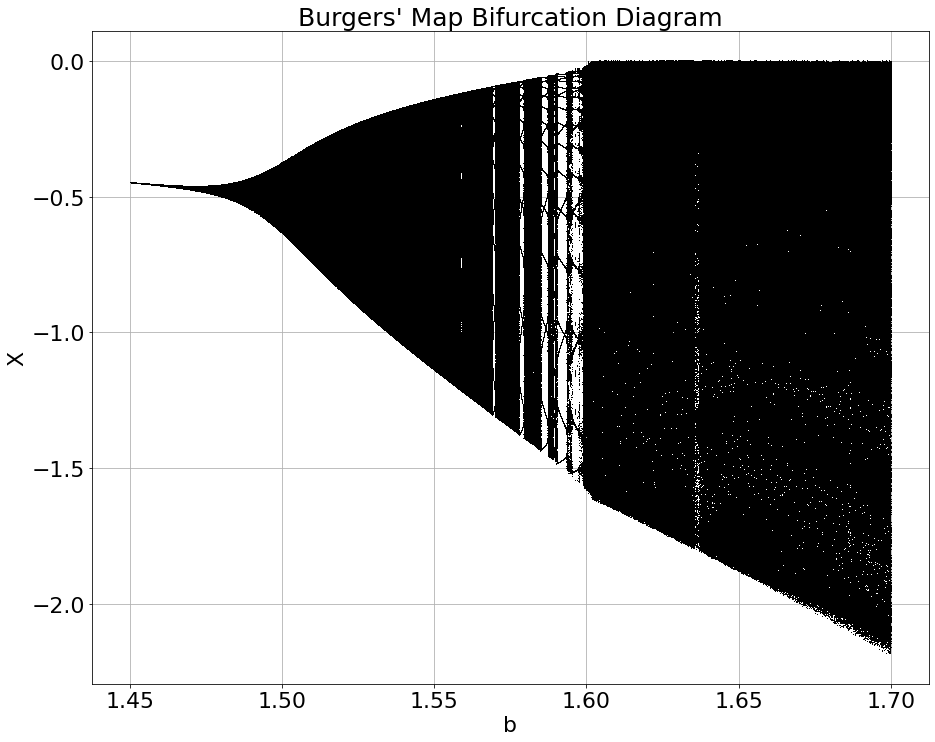

In [15]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.plot(control_params_burgers2, x_values_burgers2, ',k', alpha=1)
plt.xlabel('b', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Burgers' Map Bifurcation Diagram", fontsize=25)
plt.savefig('burgers_bifurcation2.png', transparent=True, dpi=400)

In [58]:
def burgers(state, mu, a=0.75):
    x, y = state
    return np.array([a * x - y**2, mu * y + x * y])

In [59]:
N = 5000
x0 = [0.1, 0.1]
lyaps = list()
mus = np.linspace(0.9, 1.8, 1000)
for mu in mus:
    lyaps.append(compute_lyapunov_2d(burgers, x0, [mu], n_iter=N))

In [60]:
LLE = np.max(lyaps, axis=1)

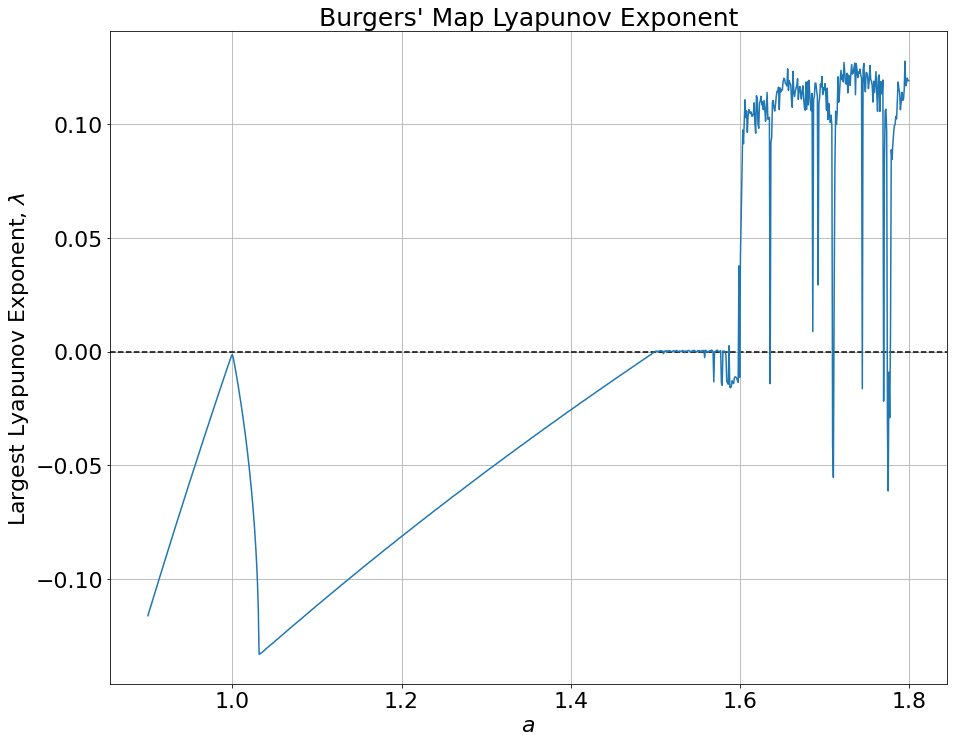

In [62]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.axhline(0, color='k', linestyle='--')
plt.plot(mus, LLE)
plt.xlabel('$a$', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Burgers' Map Lyapunov Exponent", fontsize=25)
plt.ylabel('Largest Lyapunov Exponent, $\lambda$', fontsize=22)
plt.savefig('burgers_lyapunov.png', transparent=True, dpi=400)

In [97]:
df = pd.DataFrame({'Control Parameter': control_params, 'X': x_values})

In [112]:
canvas = ds.Canvas(plot_width=2000, plot_height=1500)
agg = canvas.points(df, 'Control Parameter', 'X')
img = tf.shade(agg, cmap=fire)
img = tf.set_background(img, 'white')

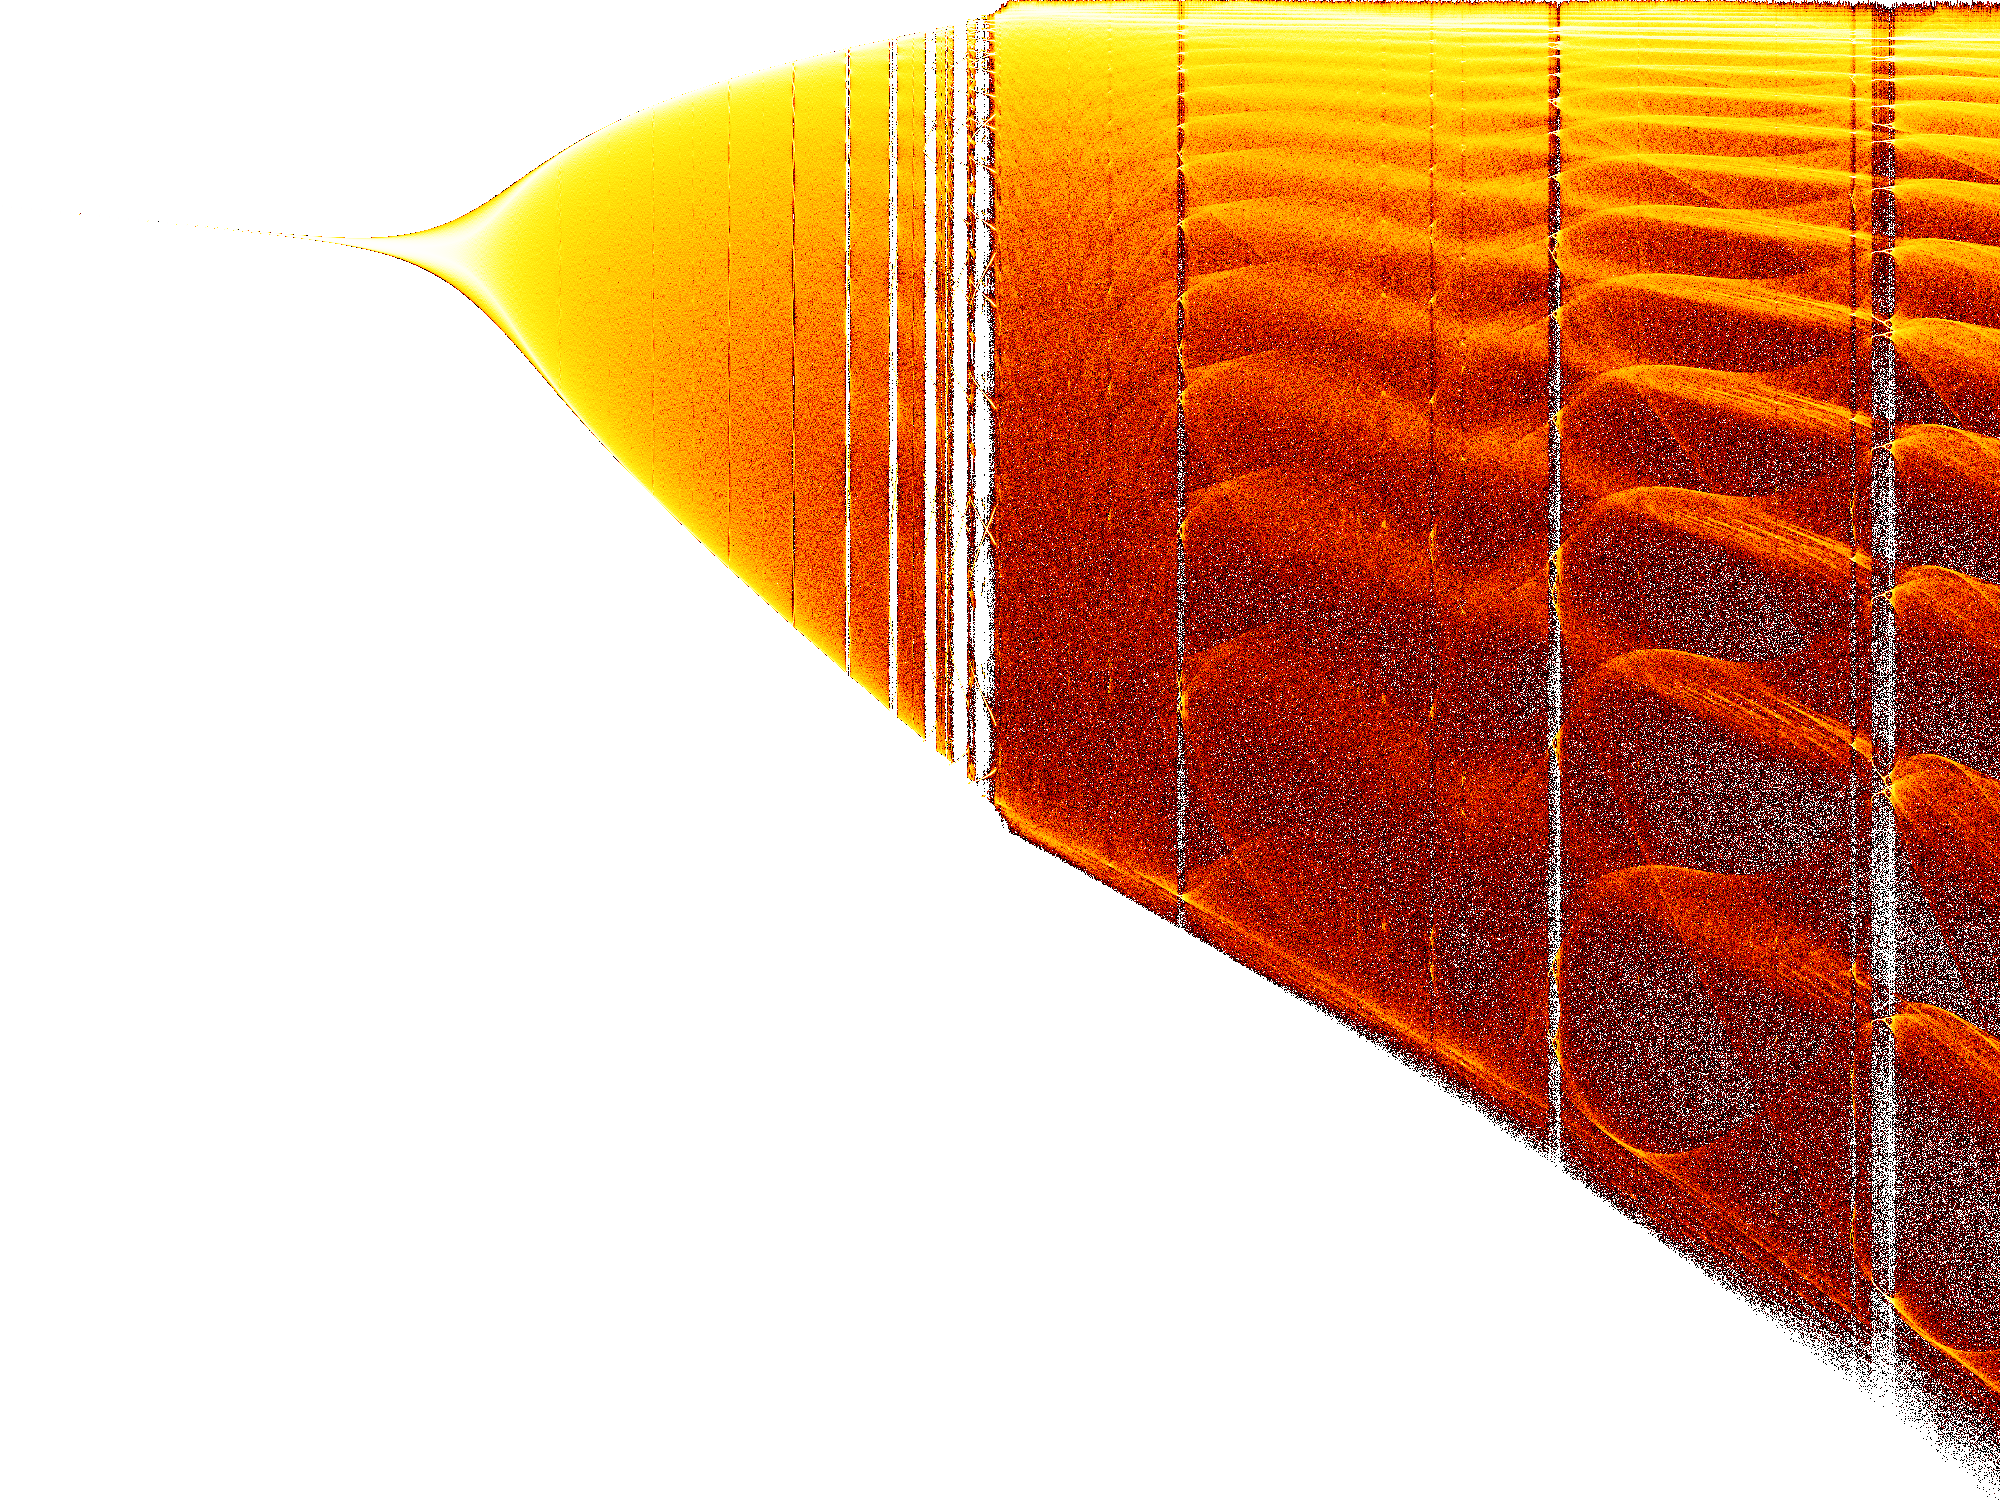

In [113]:
img

In [66]:
def generate_cubic(N, mu):
    transients = 500
    x = np.zeros((N + transients, 2))
    x[0] = [np.random.uniform(low=0.001, high=0.01), mu]
    for i in range(1, N+transients):
        x[i, 0] =  mu * x[i-1, 0] * (1-x[i-1, 0]**2)
        x[i, 1] =  mu
    return x[transients:, 0] 

In [67]:
control_params_cubic, x_values_cubic = bifurcation_diagram(generate_cubic, 1.8, 3, 0.0001, 500)

Text(0.5, 1.0, 'Cubic Map Bifurcation Diagram')

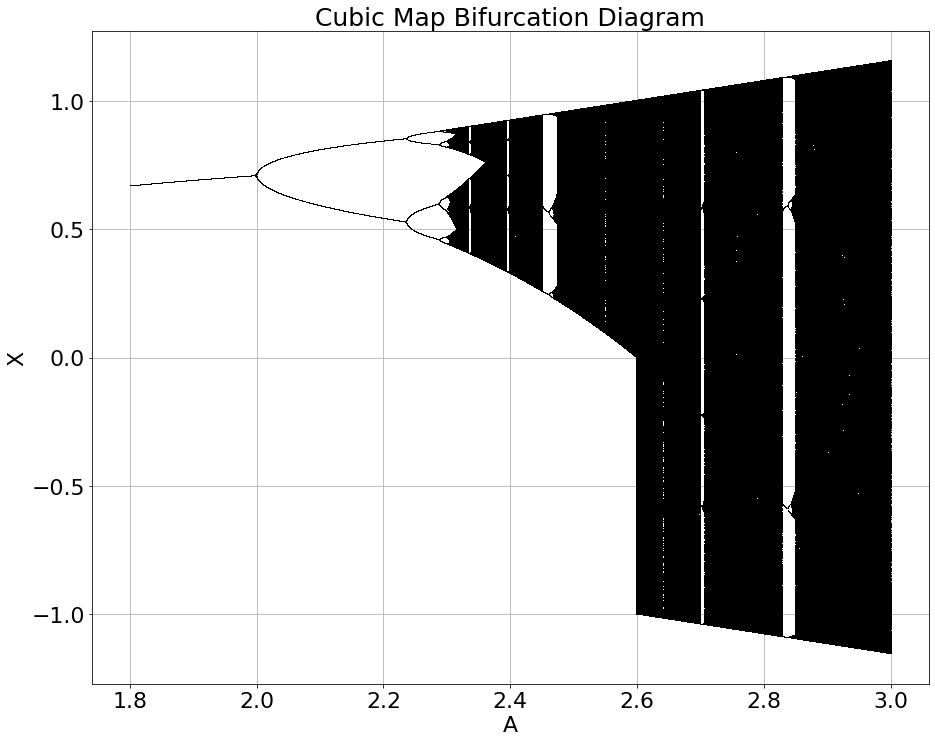

In [68]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_cubic, x_values_cubic, ',k', alpha=1)
plt.grid()
plt.xlabel('A', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Cubic Map Bifurcation Diagram', fontsize=25)
#plt.show()
#plt.savefig('cubic_bifurcation.png', transparent=True, dpi=400)

In [76]:
control_params_cubic, x_values_cubic = bifurcation_diagram(generate_cubic, 2.8, 2.9, 0.0001, 500)

Text(0.5, 1.0, 'Cubic Map Bifurcation Diagram')

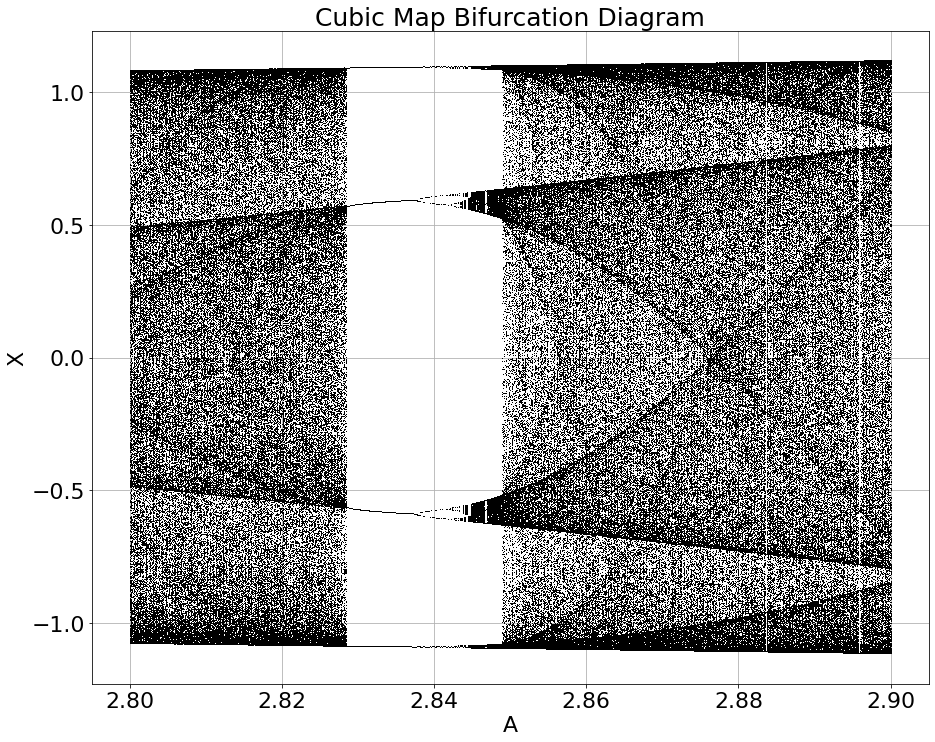

In [77]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_cubic, x_values_cubic, ',k', alpha=1)
plt.grid()
plt.xlabel('A', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Cubic Map Bifurcation Diagram', fontsize=25)

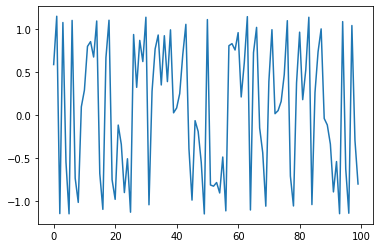

In [96]:
plt.plot(generate_cubic(10000, 3)[:100])

Liapunov Exponent Calculation

In [40]:
def cubic_map(x, mu):
    return mu * x * (1 - x**2)

In [41]:
N = 10000
x0 = 0.1
lyaps = list()
mus = np.linspace(1.8, 3, 1000)
for mu in mus:
    lyaps.append(compute_lyapunov(cubic_map, x0, [mu], n_iter=N))

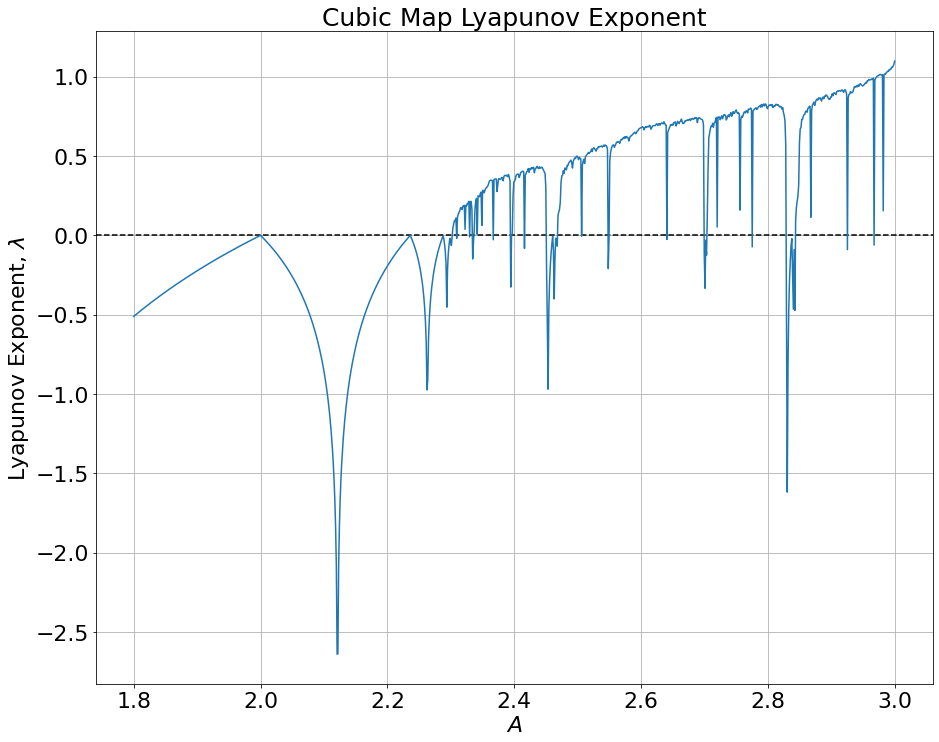

In [42]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.axhline(0, color='k', linestyle='--')
plt.plot(mus, lyaps)
plt.xlabel('$A$', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Cubic Map Lyapunov Exponent', fontsize=25)
plt.ylabel('Lyapunov Exponent, $\lambda$', fontsize=22)
plt.savefig('cubic_lyapunov.png', transparent=True, dpi=400)
#plt.show()

In [52]:
def generate_tinkerbell(N, mu):
    transients = 500
    a = 0.9
    b = -0.6013
    d = 0.5
    x = np.zeros((N + transients, 2))
    x[0] = [np.random.uniform(low=0.001, high=0.01), np.random.uniform(low=0.001, high=0.01)]
    for i in range(1, N+transients):
        x[i, 0] =  x[i-1, 0]**2 - x[i-1, 1]**2 + a * x[i-1, 0] + b * x[i-1, 1]
        x[i, 1] =  2 * x[i-1, 0] * x[i-1, 1] + mu * x[i-1, 0] + d * x[i-1, 1]
    return x[transients:] 

In [55]:
control_params_tinkerbell, x_values_tinkerbell = bifurcation_diagram(generate_tinkerbell, 0.1, 1.8, 0.0001, 500)

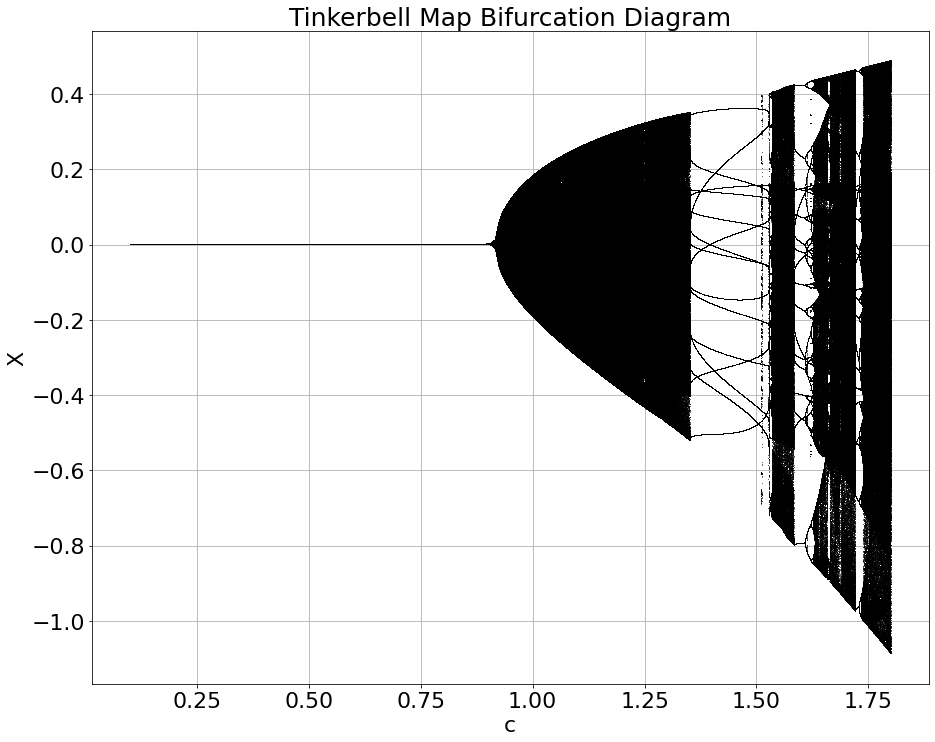

In [59]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_tinkerbell, x_values_tinkerbell, ',k', alpha=0.6)
plt.grid()
plt.xlabel('c', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Tinkerbell Map Bifurcation Diagram', fontsize=25)
#plt.show()
plt.savefig('tinkerbell_bifurcation.png', transparent=True, dpi=400)

In [39]:
control_params_tinkerbell2, x_values_tinkerbell2 = bifurcation_diagram(generate_tinkerbell, 1.5, 1.75, 0.0001, 500)

(array([-1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

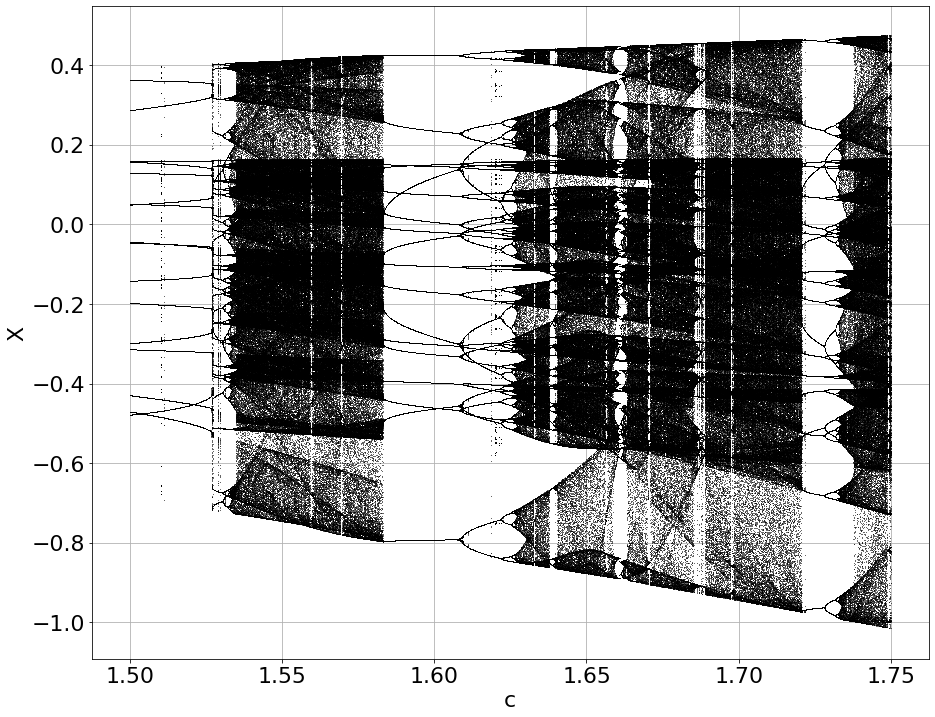

In [40]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_tinkerbell2, x_values_tinkerbell2, ',k', alpha=0.6)
plt.grid()
plt.xlabel('c', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

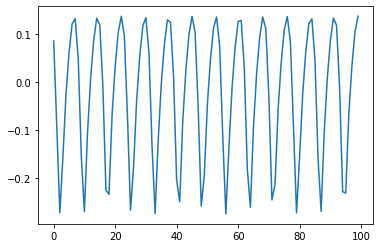

In [54]:
plt.plot(generate_tinkerbell(1000,1.1)[:100,0])

In [44]:
def tinkerbell2(state, mu, a=0.9, b=-0.6013, d=0.5):
    x, y = state
    return np.array([x**2 - y**2 + a *x + b*y, 2*x*y + mu*x + d*y])


In [48]:
N = 5000
x0 = [0.1, 0.1]
lyaps = list()
mus = np.linspace(0.1, 1.8, 1000)
for mu in mus:
    lyaps.append(compute_lyapunov_2d(tinkerbell2, x0, [mu], n_iter=N))

In [50]:
LLE = np.max(lyaps, axis=1)

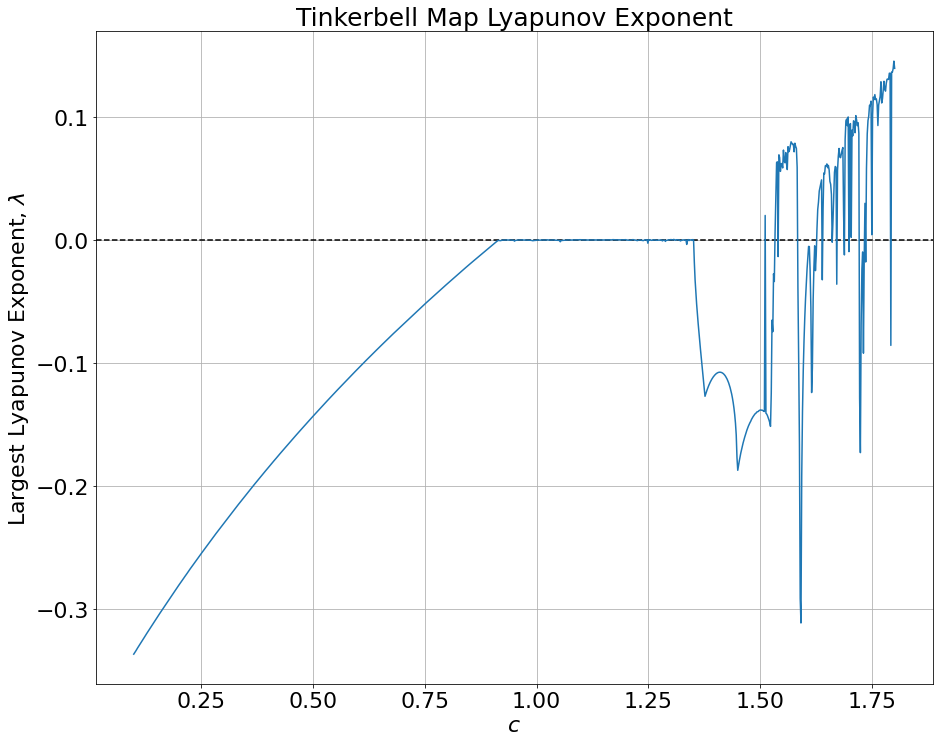

In [57]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.axhline(0, color='k', linestyle='--')
plt.plot(mus, LLE)
plt.xlabel('$c$', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Tinkerbell Map Lyapunov Exponent', fontsize=25)
plt.ylabel('Largest Lyapunov Exponent, $\lambda$', fontsize=22)
plt.savefig('tinkerbell_lyapunov.png', transparent=True, dpi=400)

(0.75, 1.5)

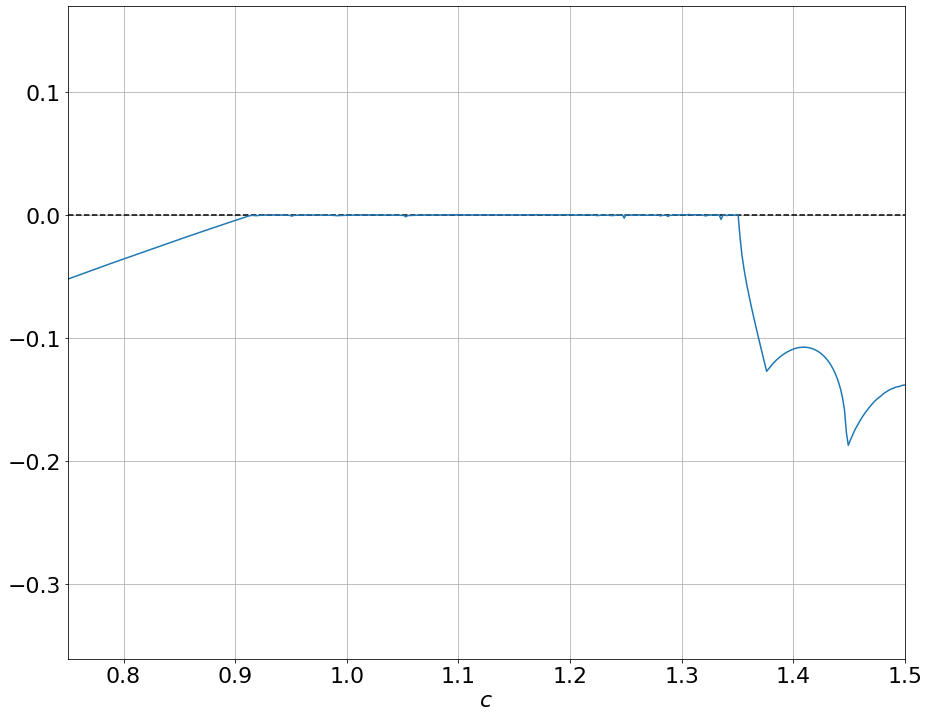

In [55]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.axhline(0, color='k', linestyle='--')
plt.plot(mus, LLE)
plt.xlabel('$c$', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0.75, 1.5)

(1.5, 1.75)

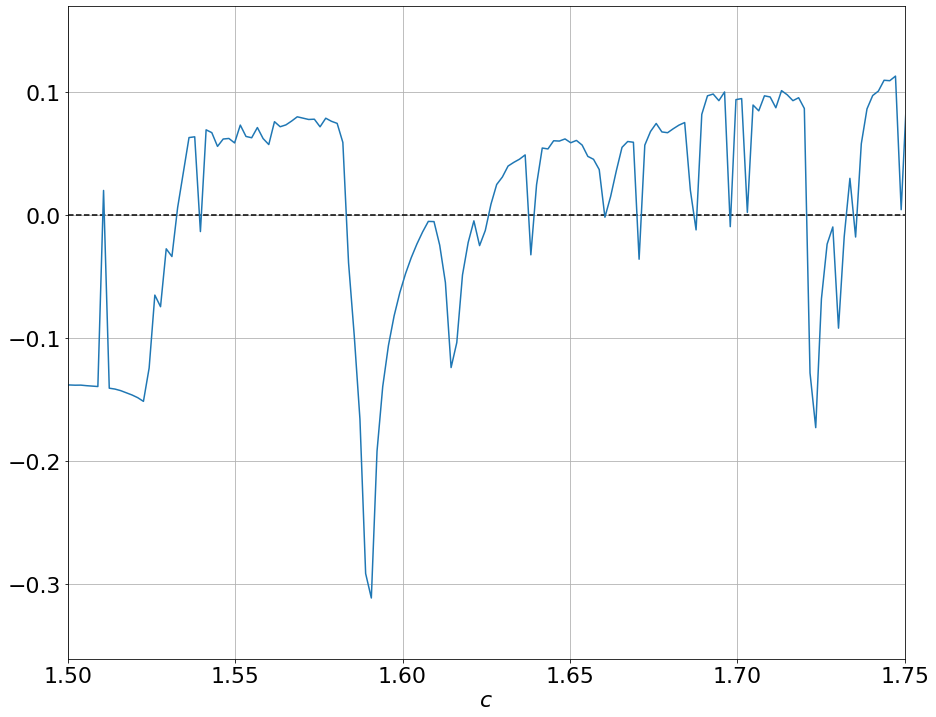

In [56]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.axhline(0, color='k', linestyle='--')
plt.plot(mus, LLE)
plt.xlabel('$c$', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(1.5,1.75)